# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |




# Solving hyperbolic equations

The most common hyperbolic equation is the advection equation
\begin{equation}
\frac{\partial U}{\partial t}+v\frac{\partial U}{\partial x}=0
\end{equation}

When v is a constant, the solution is simply the advection 
\begin{equation}
U(x,t)=U(x-v*t,0)
\end{equation}

Unfortunately, traditional forward time centered space method (FTCS) which is
used for solving the diffusion equation cannot be applied here. 
It is unconditionally unstable.

Thus, new method is needed.

## Lax Friedrichs Difference Form

If we approximate time-derivative using spatial average at old time
\begin{equation}
U_{t}=\frac{U_{j}^{n+1}-(U_{j+1}^n+U_{j-1}^n)/2}{\Delta t}
\end{equation}
We have
\begin{equation}
U_{j}^{n+1}=(U_{j+1}^n+U_{j-1}^n)/2-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_{j-1}^n)
\end{equation}
This algorithm is stable is $\Delta t<\Delta x/v$ (CFL condition)

In [ ]:
# Lax Friedrichs

import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

L=100.; Nx=101; 
tend=100.; vel=1.; Dtout=10.

dx=L/(Nx-1)
dt=dx/vel
U=np.zeros((Nx,2), float)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 

for i in range(int((Nx-1)/2)):
    U[i,0]=0.0
    U[i,1]=0.0
    
for i in range(int((Nx-1)/2), Nx):
    U[i,0]=1.0
    U[i,1]=1.0


toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):                       
        U[ix, 1] = ## write a line to finish this                                                    
    if t >= toutn*Dtout: 
        p.plot(U[:,1])
        Up[:,toutn] = U[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
    t+=dt
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y) 


def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Up)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('U')
p.show()                               
print("finished") 

## Upwind Methods

Recall the solution is just original profile displaced by Vt.
So the information is propagating from left to right if V>0. The central difference
thus should use information from the upstream. 

The spatial derivative is approximated with the one-sided difference
\begin{eqnarray}
U_{x}=(U_{j}^n-U_{j-1}^n)/\Delta x \qquad if \qquad v>0\\
U_{x}=(U_{j+1}^n-U_{j}^n)/\Delta x \qquad if \qquad v<0\\
\end{eqnarray}
It has the same stability requirement as the Lax-Friedrichs method

<IPython.core.display.Javascript object>

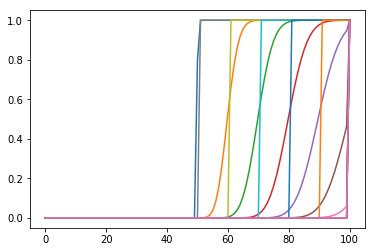

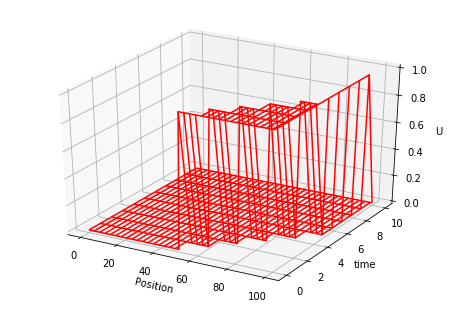

finished


In [2]:
# Upwind method

import numpy as np
from vpython import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

scene = canvas() # with this you don't need to restart kernel each time
g   = display(width = 600, height = 300, title = 'Upwind')

L=100.; Nx=101; 
tend=100.; vel=1.; Dtout=10.

dx=L/(Nx-1)
dt=dx/vel
U=np.zeros((Nx,2), float)
x=np.arange(0,Nx-1,dx)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 

for i in range(int((Nx-1)/2)):
    U[i,0]=0.0
    U[i,1]=0.0
    
for i in range(int((Nx-1)/2), Nx):
    U[i,0]=1.0
    U[i,1]=1.0


toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):   
        if vel>0:
            U[ix, 1] = # finish this line
        else:
            U[ix, 1] = #finish this line  
    if t >= toutn*Dtout: 
        p.plot(U[:,1])
        Up[:,toutn] = U[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
    t+=dt
    sol = curve(pos=[vector(x[0]-x[-1]/2.,U[0,0]*10.,0), vector(x[1]-x[-1]/2.,U[1,0]*10.,0)], color = color.yellow)
                        # Plot every other point
    for k in range(2, Nx-1): 
        sol.append(vector(x[k]-x[-1]/2.,U[k,0]*10.,0))
    rate(10)
    for obj in scene.objects:
        obj.visible=0 
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y) 


def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Up)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('U')
p.show()                               
print("finished") 

## Lax-Wendroff 

Develop a second-order formula using Taylor series:
\begin{equation}
U_{j}^{n+1}=U_{j}^n-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_{j-1}^n)+\frac{v^2\Delta t^2}{2\Delta x^2}(U_{j+1}^n-2U_{j}^n+U_{j-1}^n)
\end{equation}

0
1
2
3
4
5
6
7
8
9


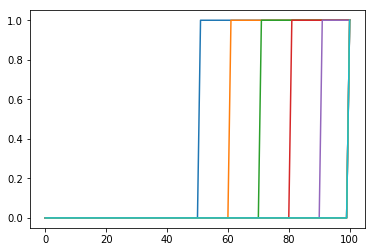

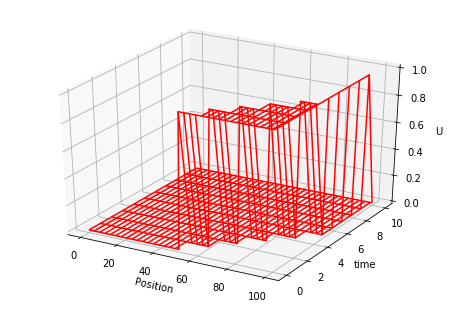

finished


In [4]:
# Lax-Wendroff

import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

L=100.; Nx=101; 
tend=100.; vel=1.; Dtout=10.

dx=L/(Nx-1)
dt=dx/vel
U=np.zeros((Nx,2), float)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 

for i in range(int((Nx-1)/2)):
    U[i,0]=0.0
    U[i,1]=0.0
    
for i in range(int((Nx-1)/2), Nx):
    U[i,0]=1.0
    U[i,1]=1.0


toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):   
        U[ix, 1] = U[ix,0]-vel*dt/2./dx*(U[ix+1,0]-U[ix-1,0])+(vel*dt/dx)**2/2.*(U[ix+1,0]-2.*U[ix,0]+U[ix-1,0])      
    if t >= toutn*Dtout: 
        p.plot(U[:,1])
        Up[:,toutn] = U[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
    t+=dt
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y) 


def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Up)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('U')
p.show()                               
print("finished") 

## Burger's equation

In a lot of advection problems, v is changing, e.g.
\begin{equation}
\frac{\partial U}{\partial t}+\epsilon U\frac{\partial U}{\partial x}=0
\end{equation}

This is called Burger's equation.
Simple upwind method failed. Needs to rewrite the equation
in the conservative form
\begin{equation}
\frac{\partial U}{\partial t}+\epsilon \frac{\partial U^2/2}{\partial x}=0
\end{equation}

Then, we can use previous advection method.

<IPython.core.display.Javascript object>

7


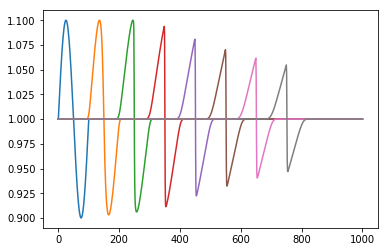

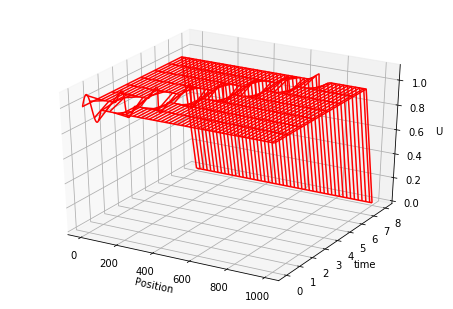

finished


In [7]:
# Burger's equation: Upwind method

import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from vpython import *

scene = canvas() # with this you don't need to restart kernel each time

L=100.; Nx=1001; 
tend=80.; Dtout=10.

dx=L/(Nx-1)

x=np.zeros(Nx,float)
U=np.zeros((Nx,2), float)
Up = np.zeros((Nx,int(tend/Dtout)+1),float) 

for i in range(Nx):
    x[i]=i*dx
    if  dx*i/10.<1:
        U[i,0]=1.0+0.1*np.sin(dx*i/10.*2.*np.pi)
        U[i,1]=U[i,0]
    else:
        U[i,0]=1.0
        U[i,1]=U[i,0]

toutn=0
t=0.
while t < tend:        
    dt=min(dx/abs((U[:,0]+1.e-10)))
    for ix in range(1, Nx - 1):
        if U[ix,0]>0:
            U[ix, 1] = U[ix,0]# finish this     
        else:
            U[ix, 1] = U[ix,0]# finish this
    if t >= toutn*Dtout: 
        p.plot(U[:,1])
        Up[:,toutn] = U[:,1]   
        print(toutn)   
        toutn += 1                        
    for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1] 
    t+=dt
    ind=int(t/dx)
    sol = curve(pos=[vector(-5.,U[ind,0]*10.-10.,0), vector(-5.+dx,U[ind+1,0]*10.-10.,0)], color = color.yellow)
                        # Plot every other point
    for k in range(2, int(10./dx)): 
        sol.append(vector(-5.+dx*k,U[ind+k,0]*10.-10.,0))
    rate(100)
    for obj in scene.objects:
        obj.visible=0
        
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y) 


def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Up)              
fig = p.figure()                                          # Create figure
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('time')
ax.set_zlabel('U')
p.show()                               
print("finished") 

## Soliton


Now we can study the soliton wave. 
The only new thing is the difference form for the third order derivative is
\begin{equation}
\frac{\partial f^3}{\partial^3 x}=\frac{f_{i+2}+2f_{i-1}-2f_{i+1}-f_{i-2}}{2\Delta x^2}
\end{equation}


In [11]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Soliton.py:      Korteweg de Vries equation for a soliton
from numpy import *
from vpython import *
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;

scene = canvas() # with this you don't need to restart kernel each time
g   = display(width = 600, height = 300, title = 'Soliton')


ds = 0.4;    dt = 0.1;    max = 2000;  mu = 0.1;  eps = 0.2;    mx = 131                              
u   = zeros( (mx, 3), float); spl = zeros( (mx, 21), float); m = 1                                                     

x = list(range(0, mx))
for  i in range(0, 131):                                   # Initial wave
    u[i, 0] = 0.5*(1 -((math.exp(2*(0.2*ds*i-5.))-1)/(math.exp(2*(0.2*ds*i-5.))+1)))
u[0,1] = 1. ; u[0,2] = 1.; u[130,1] = 0. ; u[130,2] = 0.     # End points
    
fac = mu*dt/(ds**3)              

for  i in range (1, mx-1):                              # First time step
    a1 = eps*dt*(u[i + 1, 0] + u[i, 0] + u[i - 1, 0])/(ds*6.)     
    if i > 1 and  i < 129: a2 = u[i+2,0]+2.*u[i-1,0]-2.*u[i+1,0]-u[i-2,0]
    else:  a2 = u[i-1, 0] - u[i+1, 0]
    a3 = u[i+1, 0] - u[i-1, 0] 
    u[i, 1] = u[i, 0] - a1*a3 - fac*a2/3.        
for j in range (1, max+1):                              # Next time steps 
    for i in range(1, mx-2):
        a1 = eps*dt*(u[i + 1, 1]  +  u[i, 1]  +  u[i - 1, 1])/(3.*ds)
        if i > 1 and i < mx-2:
            a2 = u[i+2,1] + 2.*u[i-1,1] - 2.*u[i+1,1] - u[i-2,1]
        else:  a2 = u[i-1, 1] - u[i+1, 1]  
        a3        = u[i+1, 1] - u[i-1, 1] 
        u[i, 2] = u[i,0] - a1*a3 - 2.*fac*a2/3.    
    for k in range(0, mx):                  # Recycle array saves memory
        u[k, 0] = u[k, 1]                
        u[k, 1] = u[k, 2] 
    sol = curve(pos=[vector(x[0]-x[-1]/2.,u[0,0]*10.,0), vector(x[1]-x[-1]/2.,u[1,0]*10.,0)], color = color.yellow)
                        # Plot every other point
    for k in range(2, mx): 
        sol.append(vector(x[k]-x[-1]/2.,u[k,0]*10.,0))
    rate(100)
    for obj in scene.objects:
        obj.visible=0 



<IPython.core.display.Javascript object>

In [ ]:
print(U)